<a href="https://colab.research.google.com/github/1101madan/Recommendation-System/blob/main/11_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/anime.csv')

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# Item Based Recommendation.

---
# Data Preprocessing
---

In [6]:
# Check columns
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
# Episodes columns should be numeric insted of object
# Rating and genre columns have most null values

In [8]:
anime.rating

,rating
0,9.37
1,9.26
2,9.25
3,9.17
4,9.16
...,...
12289,4.15
12290,4.28
12291,4.88
12292,4.98


In [9]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [10]:
# Dropping Null values
anime_no_null = anime.dropna(axis=0)

In [11]:
anime_no_null.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [12]:
anime_no_null.isna().any()

,0
anime_id,False
name,False
genre,False
type,False
episodes,False
rating,False
members,False


In [13]:
anime_no_null.shape

(12017, 7)

In [14]:
anime_df = anime_no_null.copy()

In [15]:
anime_df.isna().any()

,0
anime_id,False
name,False
genre,False
type,False
episodes,False
rating,False
members,False


In [16]:
# Converting the episodes with Numeric Values to Integers
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'],errors='coerce')

In [17]:
# checking episodes with NAN values.

anime_df[anime_df['episodes'].isna()]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,NaN,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,NaN,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,NaN,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,NaN,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,NaN,7.72,5400
...,...,...,...,...,...,...,...
11648,32238,"Watashi wa, Kairaku Izonshou",Hentai,OVA,NaN,6.32,1569
11752,28169,Buta no Gotoki Sanzoku ni Torawarete Shojo wo ...,Hentai,OVA,NaN,6.14,1992
12024,30770,Maid-san to Boin Damashii,"Harem, Hentai",OVA,NaN,5.71,1498
12045,33125,Shiiku x Kanojo: Tenshi no Kousoku-hen,Hentai,OVA,NaN,5.68,1326


In [18]:
# Dropping Rows with NAN in Episodes.

anime_df.dropna(axis=0,inplace=True)
anime_df[anime_df['episodes'].isna()]

,anime_id,name,genre,type,episodes,rating,members


In [19]:
# Check for Dupicates.
anime_df.duplicated().sum()

0

In [20]:
anime_df[anime_df['episodes'].isna()]

,anime_id,name,genre,type,episodes,rating,members


---
### EDA
---

Text(0.5, 1.0, 'Anime Average Rating Distribution')

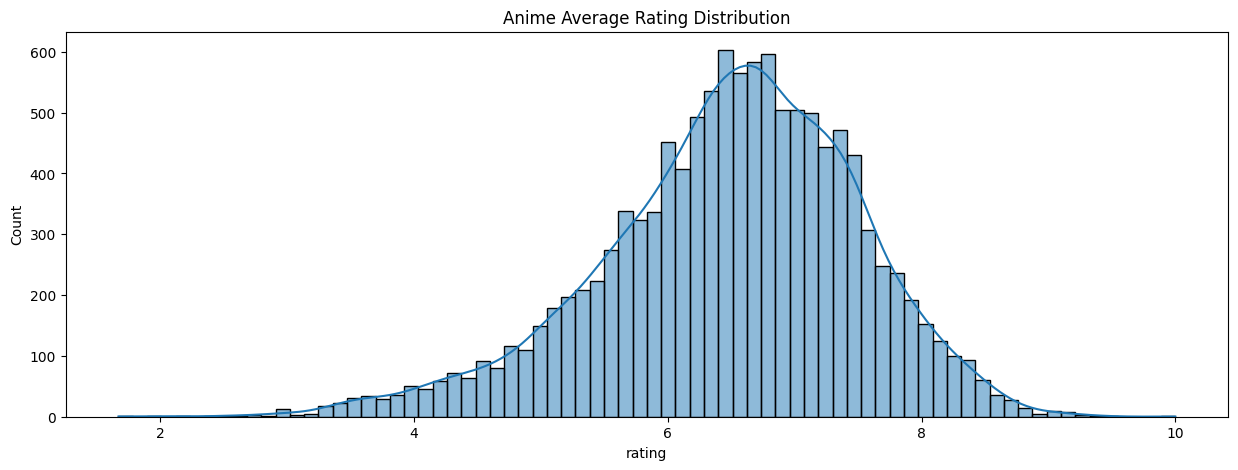

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(data=anime_df,x='rating',kde=True)
plt.title('Anime Average Rating Distribution')

Text(0.5, 1.0, 'Anime Types')

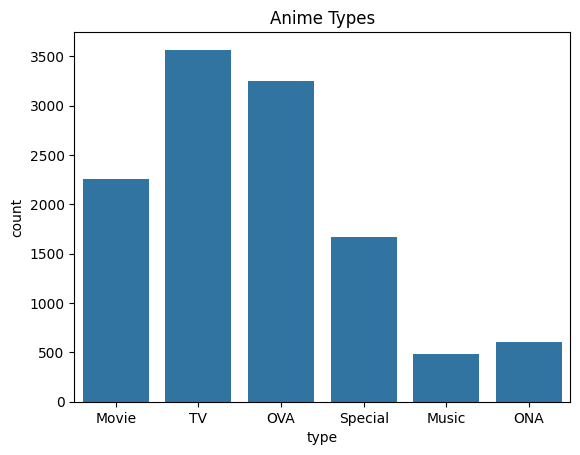

In [22]:
sns.countplot(data=anime_df,x='type')
plt.title('Anime Types')

Text(0.5, 1.0, 'Top 10 Genres')

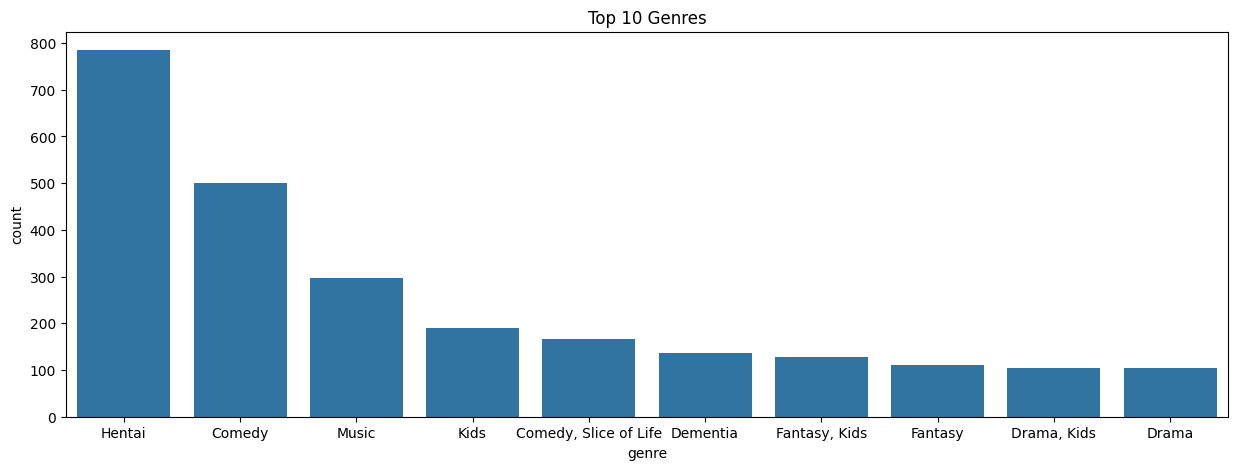

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(anime_df['genre'].value_counts().head(10))
plt.title('Top 10 Genres')

In [24]:
top_100 =anime_df.sort_values(by='rating',ascending=False).head(100)

In [25]:
top_100.head()

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665


Text(0.5, 1.0, 'Top 100 Anime rating by Type')

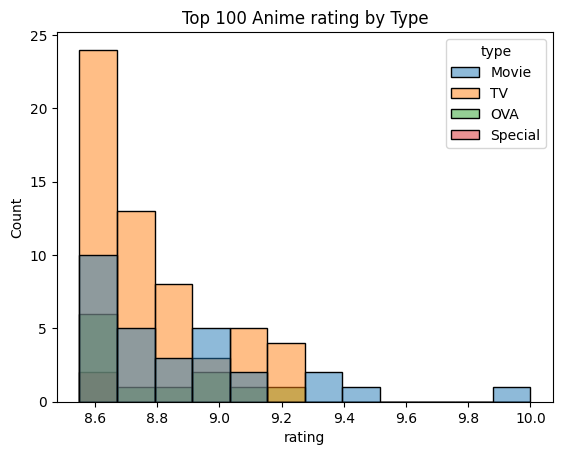

In [26]:
sns.histplot(data=top_100,x='rating',hue='type')
plt.title('Top 100 Anime rating by Type')

Text(0.5, 1.0, 'Avg Rating by Type')

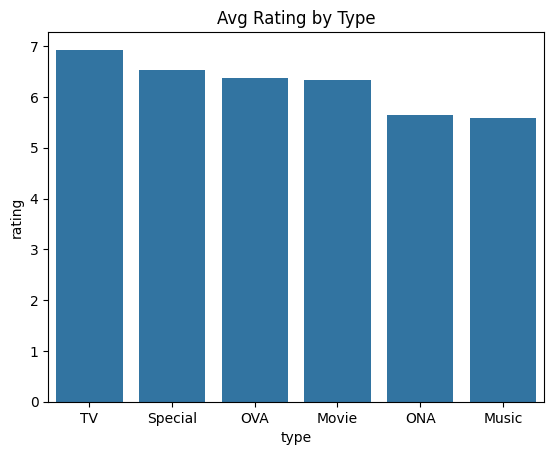

In [27]:
anime_rating = anime_df.groupby('type')['rating'].mean().sort_values(ascending=False)
anime_rating
sns.barplot(anime_rating)
plt.title('Avg Rating by Type')

In [28]:
anime_df['members'].sum()

218985163

Text(0.5, 1.0, 'Type Of Anime Rated By Most')

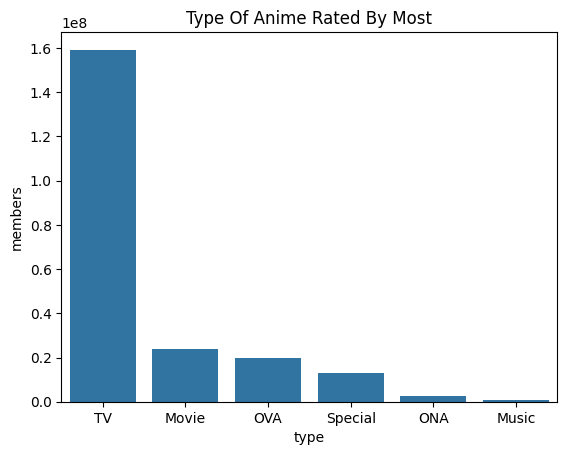

In [29]:
anime_members_type = anime_df.groupby('type')['members'].sum().sort_values(ascending=False)
sns.barplot(anime_members_type)
plt.title('Type Of Anime Rated By Most')

In [30]:
anime_members_top10 = anime_df.sort_values(by='members',ascending=False).head(10)

In [31]:
anime_members_top10

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25.0,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26.0,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25.0,8.45,633817


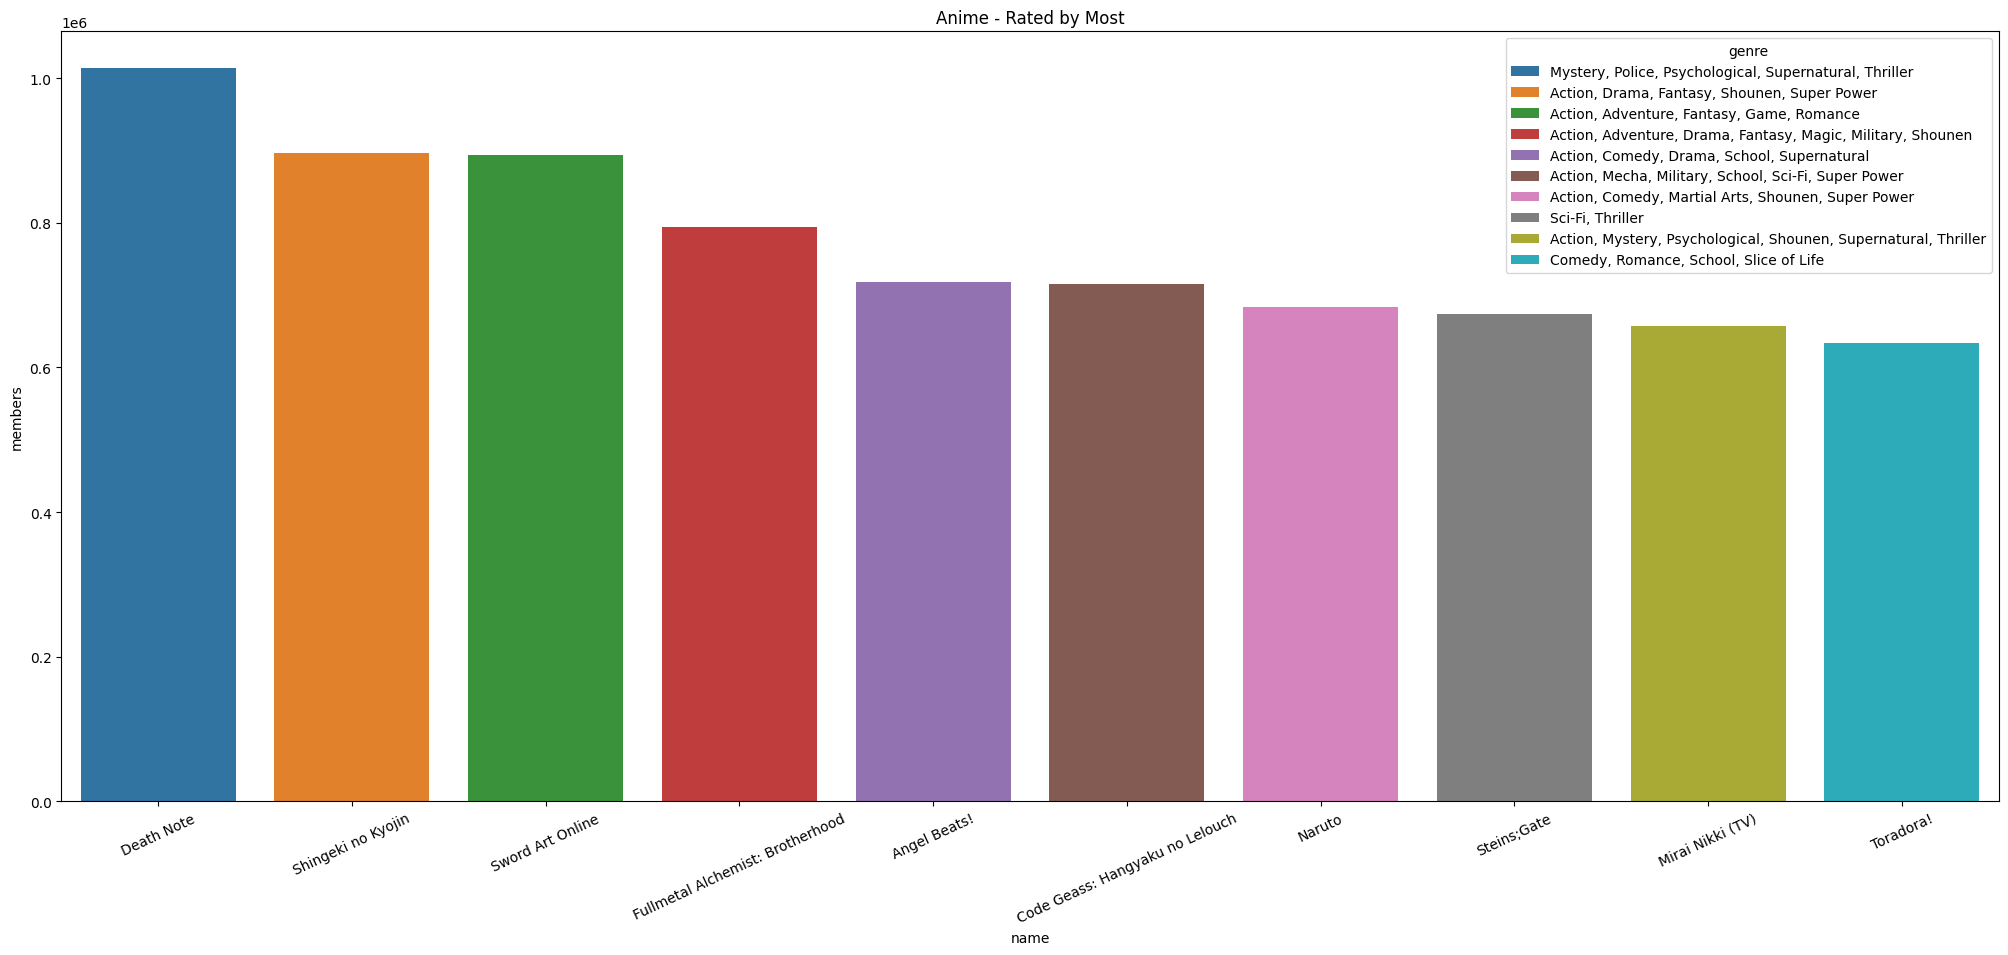

In [32]:
plt.figure(figsize=(25,10))
sns.barplot(data=anime_members_top10,x='name',y='members',hue='genre')
plt.title('Anime - Rated by Most')
plt.xticks(rotation=25)
plt.show()

In [33]:
anime_tv = anime_df[anime_df['type']=='TV']
anime_tv.head()

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10.0,9.15,93351


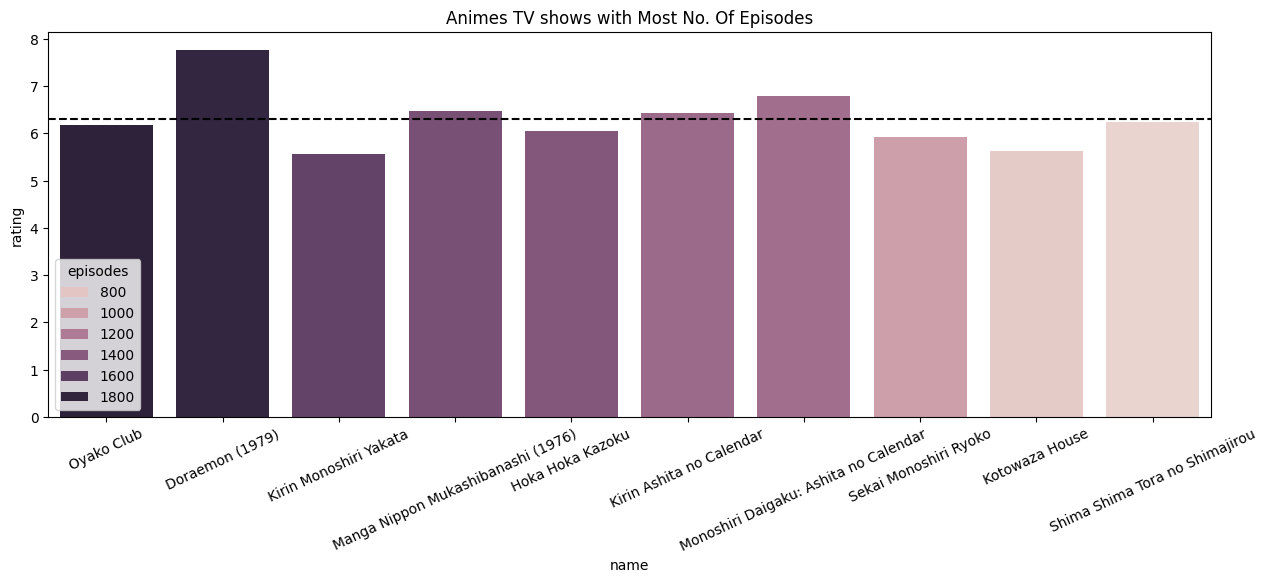

In [34]:
top_10_episodes = anime_tv.sort_values(by='episodes',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_episodes,x='name',y='rating',hue='episodes')
plt.title('Animes TV shows with Most No. Of Episodes')
plt.xticks(rotation=25)
plt.axhline(top_10_episodes['rating'].mean(),linestyle='--',color='black')
plt.show()

In [35]:
anime_members_movies = anime_df[anime_df['type']=='Movie'].sort_values('members',ascending=False).head(10)
anime_members_movies

,anime_id,name,genre,type,episodes,rating,members
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1.0,8.93,466254
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1.0,8.81,339556
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1.0,8.74,333186
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3.0,8.10,324035
132,2236,Toki wo Kakeru Shoujo,"Adventure, Drama, Romance, Sci-Fi",Movie,1.0,8.44,289206
115,523,Tonari no Totoro,"Adventure, Comedy, Supernatural",Movie,1.0,8.48,271484
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1.0,8.81,240297
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1.0,8.84,226193
225,5681,Summer Wars,"Comedy, Sci-Fi",Movie,1.0,8.30,223359
191,43,Ghost in the Shell,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Movie,1.0,8.34,223036


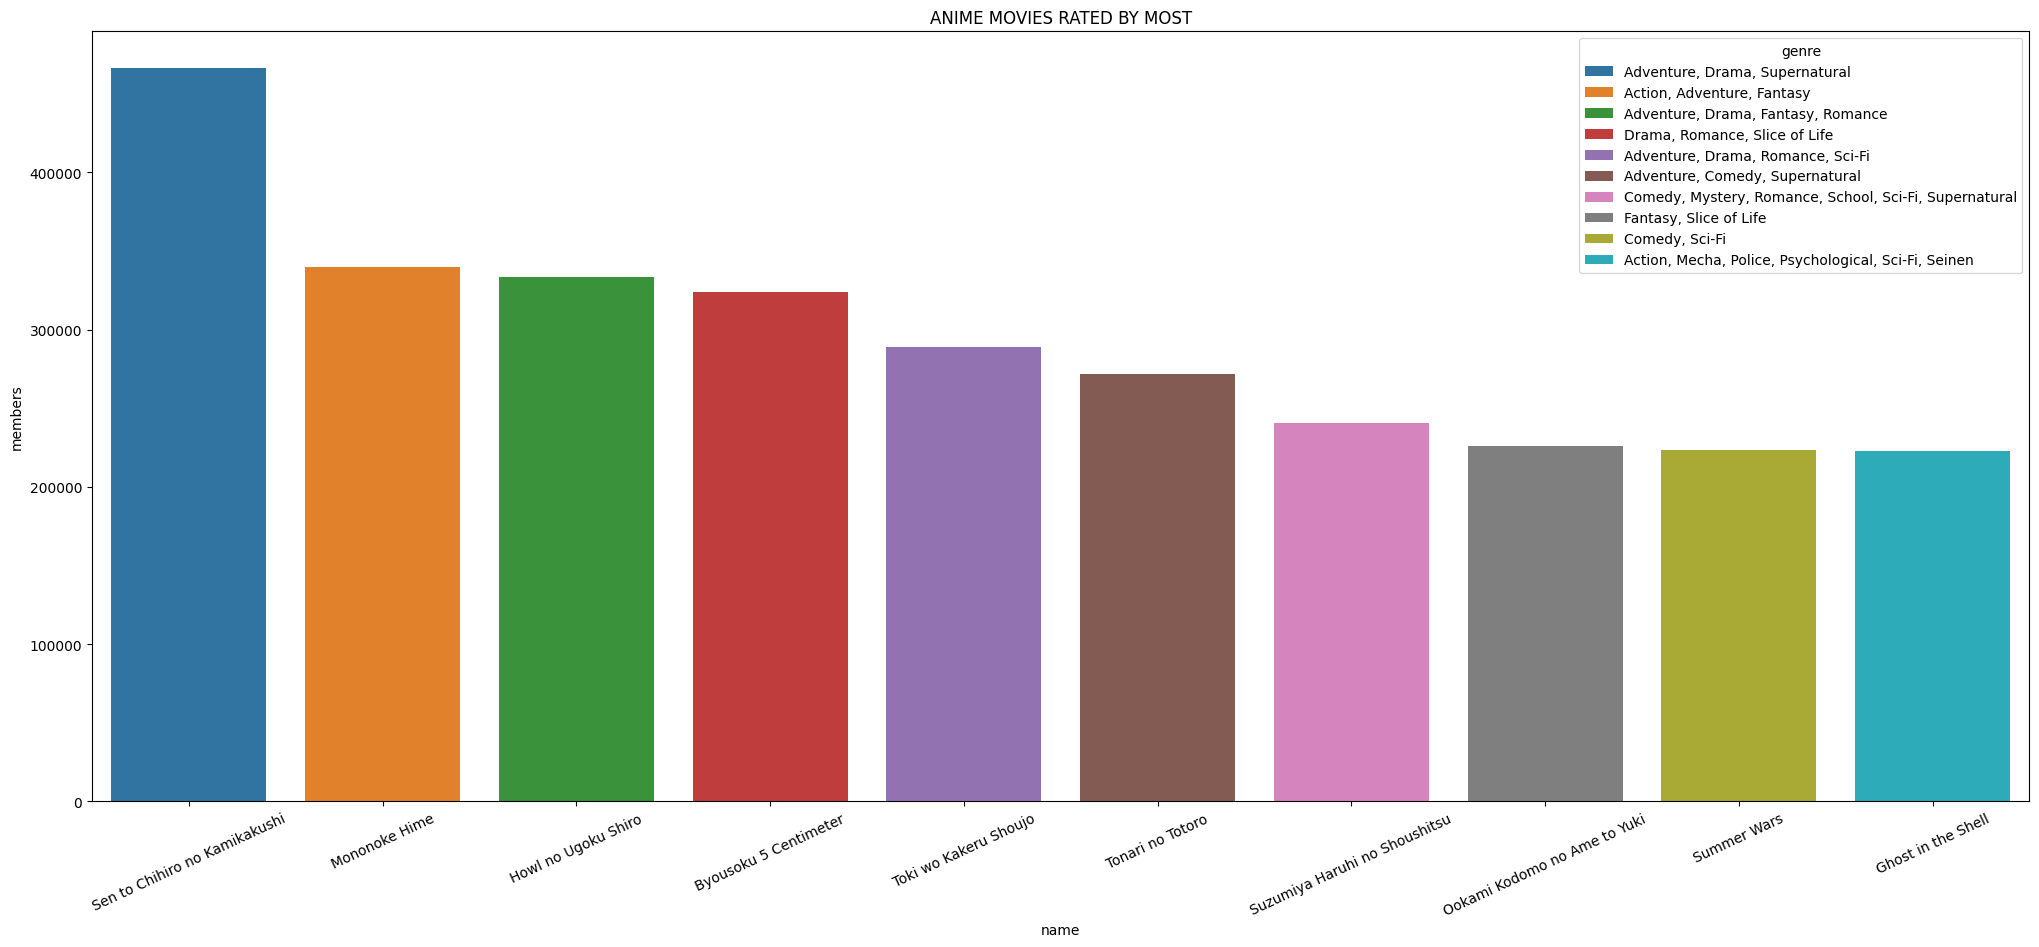

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(data=anime_members_movies,x='name',y='members',hue='genre')
plt.xticks(rotation=25)
plt.title('ANIME MOVIES RATED BY MOST')
plt.show()

In [37]:
anime_df_rating = anime_df.sort_values(by=['members','rating'],ascending=[False,False])
anime_df_top10 = anime_df_rating.head(20)
anime_df_top10

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25.0,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26.0,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25.0,8.45,633817


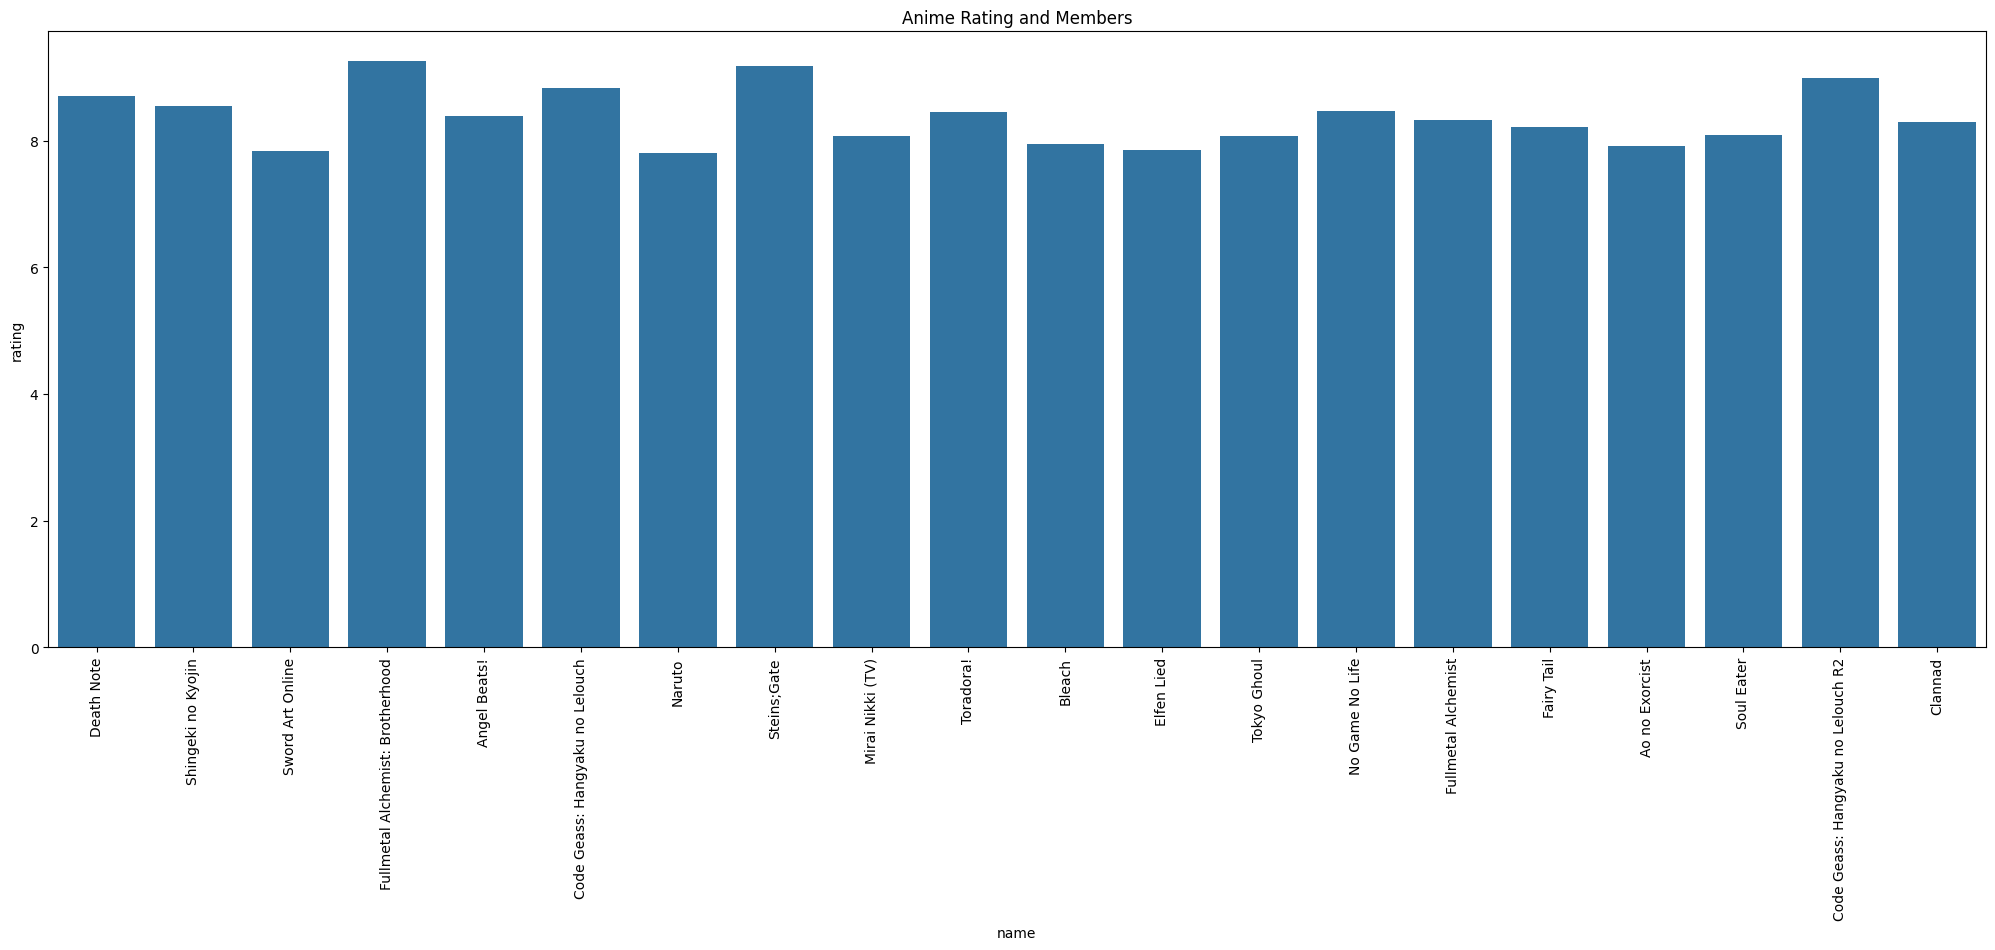

In [38]:
plt.figure(figsize=(25,8))
sns.barplot(anime_df_top10,x='name',y='rating')
plt.xticks(rotation=90)
plt.title('Anime Rating and Members')
plt.show()

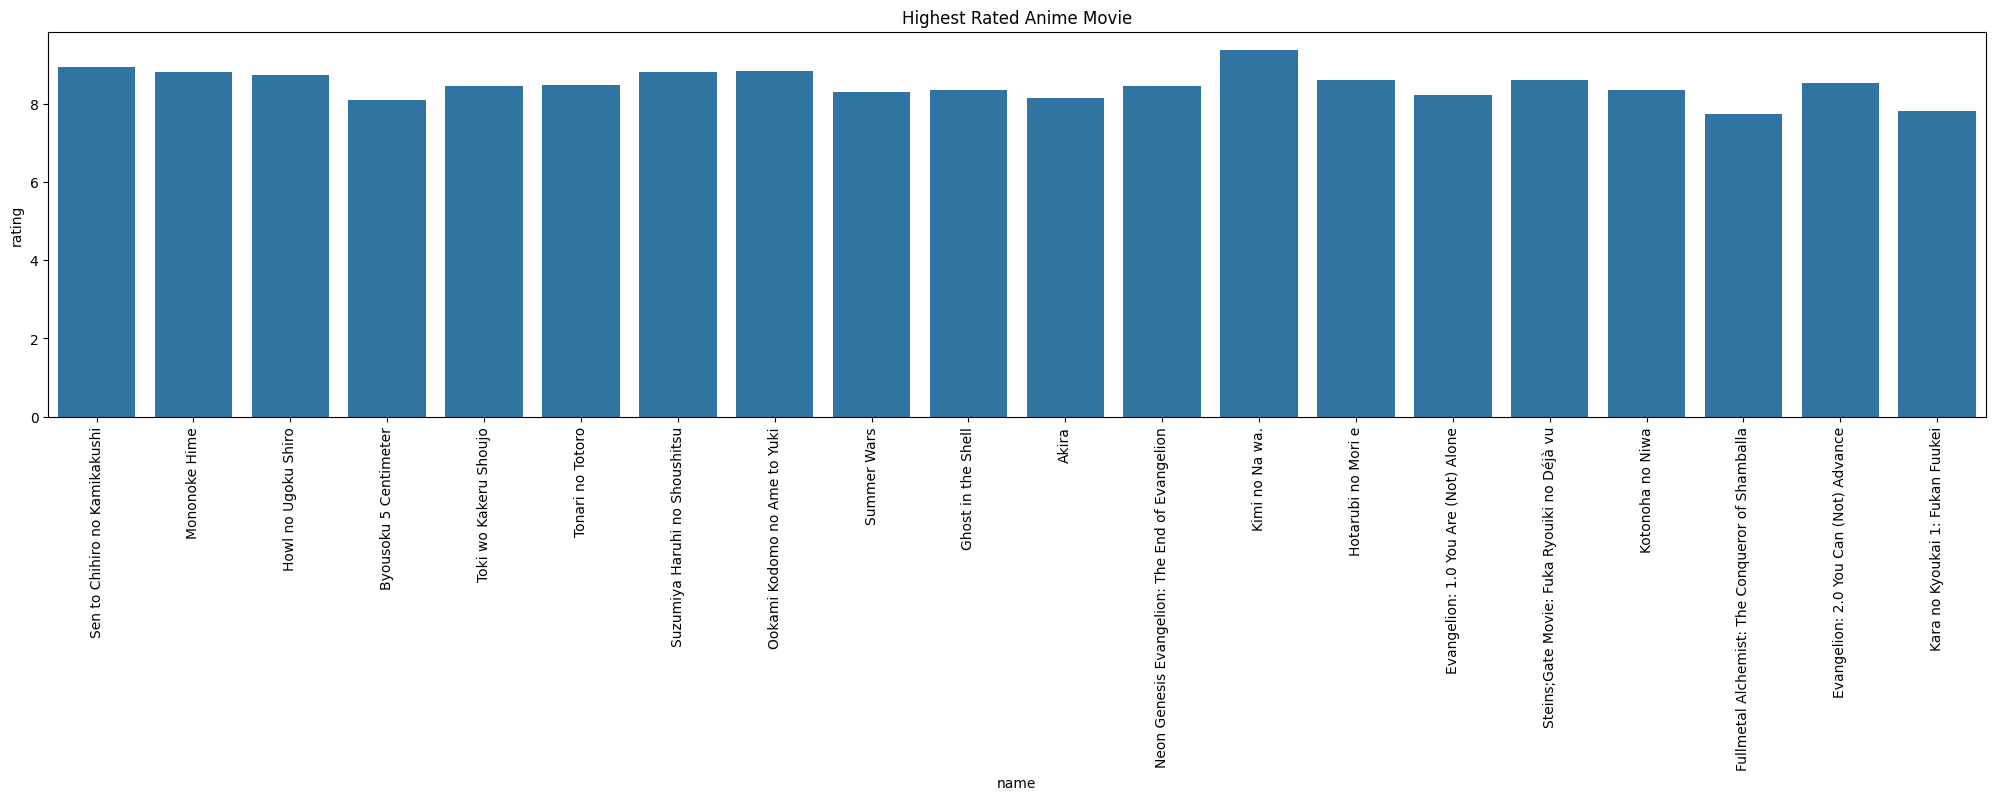

In [39]:
plt.figure(figsize=(25,5))
plt.title('Highest Rated Anime Movie')
sns.barplot(data=anime_df_rating[anime_df_rating['type']=='Movie'].head(20),x='name',y='rating')
plt.xticks(rotation=90)
plt.show()

In [40]:
anime_df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

Text(0.5, 1.0, 'Correlation Matrix - Numerical Columns')

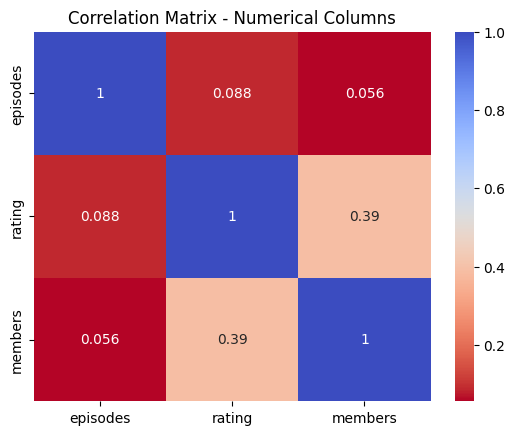

In [41]:
sns.heatmap(anime_df[['episodes', 'rating', 'members']].corr(),cmap='coolwarm_r',annot=True)
plt.title('Correlation Matrix - Numerical Columns')

* Episodes have no Correlation with the anime rating or with the members in the community.
* Rating is Positvely correlated weakly with the No. of community members/



In [42]:
anime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,11830.0,13404.150211,11110.087616,1.00,3326.2500,9820.50,23302.50,34519.0
episodes,11830.0,12.486729,47.097131,1.00,1.0000,2.00,12.00,1818.0
rating,11830.0,6.484609,1.019147,1.67,5.8925,6.57,7.19,10.0
members,11830.0,18511.002790,55371.439012,12.00,232.2500,1589.50,9832.00,1013917.0


sns.pairplot(anime_df,kind='reg')

<Axes: xlabel='rating', ylabel='members'>

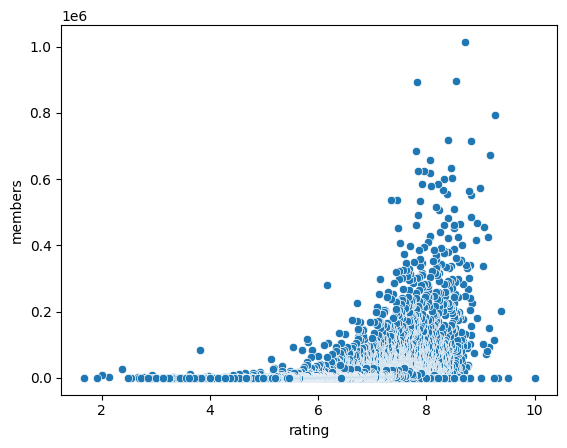

In [43]:
sns.scatterplot(data=anime_df,x='rating',y='members')

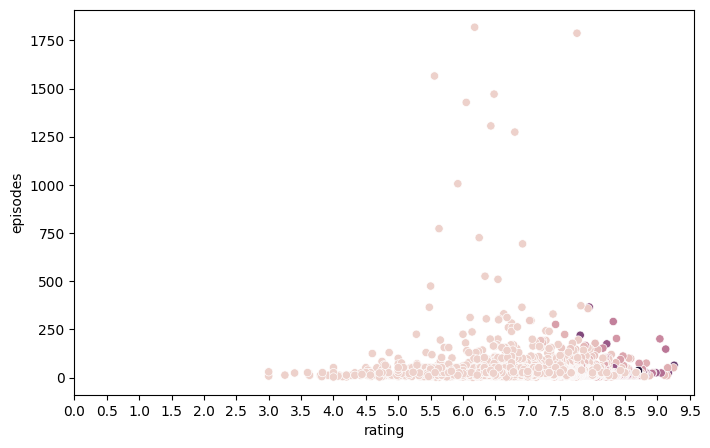

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=anime_df[anime_df['type']=='TV'],x='rating',y='episodes',hue='members',legend=False)
plt.xticks(np.arange(0,10,0.5))
plt.show()

#### EDA
* TV is the most popular type of anime
* Hentai is the most popular Genre
* TV Animes are havve huge community following
* TV anime have huge community members, followed by movies and OVA
* Death Note and Shingeki no kyojin are most popular Animes
Top 10 highest rated animes are all TV
* Sen to Chihiro no kamikakushi is the most popular Anime TV show
* Okayo Club and Doraemon have highst No. of Episodes

In [45]:
# Rating is skewed for animes with lower no. of members.
anime_df[anime_df['members']<100].count()

,0
anime_id,1547
name,1547
genre,1547
type,1547
episodes,1547
rating,1547
members,1547


In [46]:
anime_df.sort_values(by='rating',ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1.0,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10.0,9.15,93351


---
# Feature Extraction
---


In [47]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


#### Genre feature Extraction

In [48]:
anime_genre_split = anime_df['genre'].str.get_dummies(', ')
anime_genre_split

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
anime_df.drop('genre',axis=1,inplace=True)

In [50]:
anime_df_genre = pd.concat([anime_df,anime_genre_split],axis=1)

In [51]:
anime_df.isna().any()

,0
anime_id,False
name,False
type,False
episodes,False
rating,False
members,False


In [52]:
anime_df.head()

,anime_id,name,type,episodes,rating,members
0,32281,Kimi no Na wa.,Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665
2,28977,Gintama°,TV,51.0,9.25,114262
3,9253,Steins;Gate,TV,24.0,9.17,673572
4,9969,Gintama&#039;,TV,51.0,9.16,151266


#### Type - Feature Extraction

In [53]:
anime_df_types_split = pd.get_dummies(anime_df_genre['type'],dtype=int)
anime_df_types_split

,Movie,Music,ONA,OVA,Special,TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
12289,0,0,0,1,0,0
12290,0,0,0,1,0,0
12291,0,0,0,1,0,0
12292,0,0,0,1,0,0


In [54]:
anime_type = anime_df_genre.drop('type',axis=1)

In [55]:
anime_type = pd.concat([anime_type,anime_df_types_split],axis=1)

In [56]:
anime_type.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Normalizing the Rating in anime Dataset

In [57]:
anime_encoded=anime_type.copy()

In [58]:
anime_encoded.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# Normalizing the Ratings -  To make ratings compareable.
# (rating-min)/(max-min)
anime_normalized_rating = anime_encoded.copy()
anime_rating = anime_normalized_rating['rating']
anime_normalized_rating['nor_rating'] = (anime_rating-anime_rating.min())/(anime_rating.max()-anime_rating.min())

In [60]:
anime_normalized_rating.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.924370
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.911164
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.909964
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.899160


# Recommendation System

In [61]:
anime_recommend = anime_normalized_rating.drop(['rating','members','anime_id'],axis=1)

In [62]:
anime_recommend

,name,episodes,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
0,Kimi no Na wa.,1.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.924370
1,Fullmetal Alchemist: Brotherhood,64.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.911164
2,Gintama°,51.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.909964
3,Steins;Gate,24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
4,Gintama&#039;,51.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.899160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.297719
12290,Under World,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.313325
12291,Violence Gekiga David no Hoshi,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.385354
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.397359


In [63]:
anime_recommend.index= anime_normalized_rating['name']
anime_recommend.drop('name',axis=1,inplace=True)

In [64]:
anime_recommend.head()

,episodes,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.924370
Fullmetal Alchemist: Brotherhood,64.0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0.911164
Gintama°,51.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.909964
Steins;Gate,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
Gintama&#039;,51.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.899160


In [65]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine,correlation


In [66]:
item_sim = 1- pairwise_distances(anime_recommend,metric='cosine')

In [67]:
item_sim.shape

(11830, 11830)

In [68]:
np.fill_diagonal(item_sim,0)

In [69]:
item_sim_df =pd.DataFrame(item_sim,index=anime_recommend.index,columns=anime_recommend.index)

In [70]:
item_sim_df.head()

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.392528,0.387598,0.393901,0.387525,0.474180,0.384042,0.388202,0.344699,0.396036,...,0.293304,0.356675,0.359908,0.280882,0.281704,0.277146,0.279850,0.390573,0.293887,0.516275
Fullmetal Alchemist: Brotherhood,0.392528,0.000000,0.998403,0.996816,0.998404,0.972338,0.999299,0.999084,0.333193,0.978360,...,0.565532,0.810071,0.809011,0.569749,0.569504,0.570803,0.570049,0.939220,0.565306,0.561418
Gintama°,0.387598,0.998403,0.000000,0.997313,1.000000,0.973205,0.998680,0.998391,0.367826,0.986232,...,0.565981,0.810057,0.809036,0.570050,0.569815,0.571060,0.570338,0.938966,0.565762,0.561986
Steins;Gate,0.393901,0.996816,0.997313,0.000000,0.997309,0.971695,0.997083,0.997151,0.342384,0.980470,...,0.569421,0.811407,0.810592,0.572692,0.572509,0.573467,0.572915,0.939236,0.569240,0.566068
Gintama&#039;,0.387525,0.998404,1.000000,0.997309,0.000000,0.973190,0.998682,0.998393,0.367767,0.986222,...,0.565936,0.810032,0.809008,0.570014,0.569778,0.571026,0.570303,0.938950,0.565717,0.561934


In [71]:
item_sim_df.sort_values(by='Kimi no Na wa.',ascending=False).T.head()

name,Aura: Maryuuin Kouga Saigo no Tatakai,Kokoro ga Sakebitagatterunda.,Harmonie,Air Movie,Hotarubi no Mori e,&quot;Bungaku Shoujo&quot; Movie,Clannad Movie,Taifuu no Noruda,Momo e no Tegami,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,...,Ten Little Gall Force,Platonic Chain: Ansatsu Jikkouchuu,Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z!,Ultraman M78 Gekijou: Love and Peace,Computer Obaachan,Soujuu Senshi Psychic Wars,Generation of Chaos,Qin Shiming Yue Zhi: Guoqing Tebie Pian,Ojarumaru: Wasureta Mori no Hinata,Kimi no Na wa.
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.928521,0.923068,0.920630,0.920096,0.851828,0.847385,0.845790,0.838863,0.838769,0.837526,...,0.191258,0.190978,0.188407,0.187366,0.184908,0.183884,0.180384,0.175989,0.175684,0.000000
Fullmetal Alchemist: Brotherhood,0.373727,0.432079,0.437127,0.437897,0.396700,0.401555,0.408962,0.406878,0.481145,0.476370,...,0.339957,0.499462,0.331784,0.351203,0.356951,0.413980,0.400452,0.389029,0.389048,0.392528
Gintama°,0.375892,0.426452,0.431280,0.432015,0.391585,0.396204,0.397405,0.409013,0.474765,0.477260,...,0.355844,0.508941,0.331156,0.372055,0.365492,0.415632,0.384484,0.399478,0.384759,0.387598
Steins;Gate,0.373313,0.432362,0.436465,0.437079,0.397272,0.401067,0.402027,0.421490,0.480756,0.482942,...,0.346953,0.519119,0.316342,0.368478,0.368610,0.408594,0.378566,0.378561,0.378558,0.393901
Gintama&#039;,0.375837,0.426383,0.431219,0.431954,0.391518,0.396146,0.397350,0.408968,0.474693,0.477192,...,0.355806,0.508943,0.331115,0.372024,0.365463,0.415617,0.384463,0.399461,0.384741,0.387525


def get_similar_anime(anime_name,sim_df,top_n=10):
  anime = sim_df[anime_name]
  similar_anime = anime.sort_values(ascending=False)[1:top_n+1]
  return similar_anime

get_similar_anime('Harmonie',item_sim_df)

In [151]:
# Clearing RAM
import gc
gc.collect()

3167

Please Enter the Anime Name to generate Top 10 Anime Recommendations:
Platonic Chain: Ansatsu Jikkouchuu
Please Enter the Similarity Score Threshold: 
0.75

*********************************
TOP ANIME SIMILAR TO -------------- Platonic Chain: Ansatsu Jikkouchuu --------------
*******************************
WITH SIMILARITY SCORE GREATER THAN -------------- 0.75 --------------
*******************************
Total No. Of Anime Recomendations : -------------- 38 Movies --------------


,Platonic Chain: Ansatsu Jikkouchuu
name,
Platonic Chain: Web,0.969523
Tanita Shokudou,0.858842
Visitor,0.852297
Hanoka Recap,0.850602
Guitar Shoujo!,0.849384
Tokyu Plaza Ginza Open,0.843842
20-dai no Heya-hen,0.839299
Enkinhou no Hako: Hakase no Sagashimono,0.839159
Summer Train!,0.836747


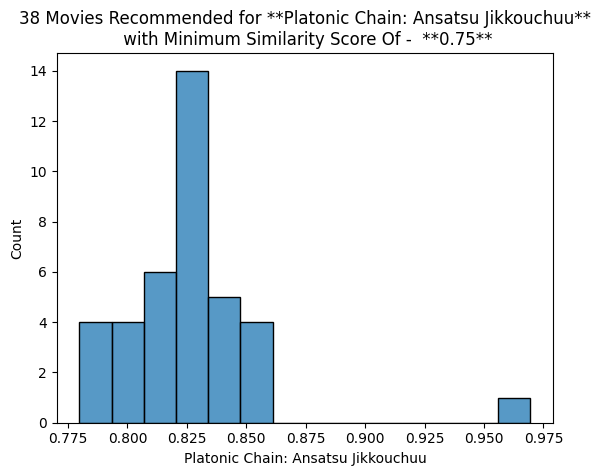

In [155]:
# Enter Target Anime
anime_name_input = input('Please Enter the Anime Name to generate Top 10 Anime Recommendations:\n')

# Enter Threshold Similarity Score
similarity_score_threshold = input('Please Enter the Similarity Score Threshold: \n')


print("\n*********************************\nTOP ANIME SIMILAR TO --------------",anime_name_input,'--------------')
print('*******************************\nWITH SIMILARITY SCORE GREATER THAN --------------',similarity_score_threshold,'--------------')
print('*******************************')

top_anime_recommendations = item_sim_df.sort_values(by=anime_name_input,ascending=False)
recommendations_for_input = top_anime_recommendations[anime_name_input]
filter_rows = recommendations_for_input.values>float(similarity_score_threshold)
top_recommendations_for_input = recommendations_for_input[filter_rows]
print("Total No. Of Anime Recomendations : --------------",top_recommendations_for_input.shape[0],'Movies','--------------')

top_recommendations_for_input

sns.histplot(top_recommendations_for_input)
plt.title(f'{top_recommendations_for_input.shape[0]} Movies Recommended for **{anime_name_input}**\n with Minimum Similarity Score Of -  **{similarity_score_threshold}**')
top_recommendations_for_input.head(20)

---
##### Q: Difference Between Item Based and User Based Collaborative Filtering.

###### User Based Collaborative Filtering takes into Account the rating given by multiple users/customers to a same item for recommending the items that were rated similar by other users/customers; i.e finding similar users.

###### Item Based Collaborative Filtering takes into account individual item attributes to qualitfy the similarity between each item. i.e finding similar items/products.
----

#### Q: What is Collaborative Filtering And how does it worK?

###### It is a technique used by recomendation system where the items or products are filtered based on the  Similarites(Correlation, cosine, manhattan etc.) in the information like rating or other product/item attributes

In [152]:
top_recommendations_for_input.shape[0]

32